<a href="https://colab.research.google.com/github/etappau/ProjectTerm/blob/master/TermProject_Unified_Medical_Language_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
train0 = pd.read_csv('AskAPatient.fold-0.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train1 = pd.read_csv('AskAPatient.fold-1.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train2 = pd.read_csv('AskAPatient.fold-2.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train3 = pd.read_csv('AskAPatient.fold-3.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train4 = pd.read_csv('AskAPatient.fold-4.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train5 = pd.read_csv('AskAPatient.fold-5.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train6 = pd.read_csv('AskAPatient.fold-6.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train7 = pd.read_csv('AskAPatient.fold-7.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train8 = pd.read_csv('AskAPatient.fold-8.train.txt', encoding='ISO-8859-1', sep='\t', header = None)
train9 = pd.read_csv('AskAPatient.fold-9.train.txt', encoding='ISO-8859-1', sep='\t', header = None)

In [0]:
frames = [train0, train1, train2, train3, train4, train5, train6, train7, train8, train9]

In [0]:
df = pd.concat(frames)

In [0]:
df = df.drop([2], axis = 1)

In [0]:
df.columns = ['CUID', 'Disease']

In [52]:
df.CUID.nunique()

1036

In [53]:
df.Disease.nunique()

1034

In [0]:
df = df.groupby(['Disease', 'CUID']).size().reset_index().rename(columns={0:'count'})

In [55]:
df[df[['Disease']].duplicated() == True]

,Disease,CUID,count
596,Neck pain,81680008,36
846,Tachycardia,6285003,19


In [56]:
df.loc[df['Disease'] == 'Neck pain']

,Disease,CUID,count
595,Neck pain,81680005,872
596,Neck pain,81680008,36


In [64]:
df.loc[df['Disease'] == 'Tachycardia']

,Disease,CUID,count
845,Tachycardia,3424008,127
846,Tachycardia,6285003,19


In [0]:
df = df.drop_duplicates(subset=['Disease'],keep='first')

In [58]:
df.loc[df['Disease'] == 'Neck pain']

,Disease,CUID,count
595,Neck pain,81680005,872


In [66]:
df.loc[df['Disease'] == 'Tachycardia']

,Disease,CUID,count
845,Tachycardia,3424008,127


In [67]:
df.CUID.nunique()

1034

In [68]:
df.Disease.nunique()

1034

In [0]:
df.groupby(['CUID', 'Disease'])\
  .apply(lambda x : x.count())\
  .iloc[:,0]\
  .unstack()\
  .fillna(0)

In [0]:
train = pd.concat(frames)

In [0]:
train.columns = ['CUID', 'Disease', 'Patient Complaint Narrative']

In [238]:
train.shape

(156652, 3)

In [0]:
train.drop(train[train.CUID == 81680008].index, inplace=True)

In [0]:
train.drop(train[train.CUID == 6285003].index, inplace=True)

In [241]:
train.shape

(156182, 3)

In [242]:
156652 - 156182

470

In [0]:
test0 = pd.read_csv('AskAPatient.fold-0.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test1 = pd.read_csv('AskAPatient.fold-1.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test2 = pd.read_csv('AskAPatient.fold-2.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test3 = pd.read_csv('AskAPatient.fold-3.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test4 = pd.read_csv('AskAPatient.fold-4.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test5 = pd.read_csv('AskAPatient.fold-5.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test6 = pd.read_csv('AskAPatient.fold-6.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test7 = pd.read_csv('AskAPatient.fold-7.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test8 = pd.read_csv('AskAPatient.fold-8.test.txt', encoding='ISO-8859-1', sep='\t', header = None)
test9 = pd.read_csv('AskAPatient.fold-9.test.txt', encoding='ISO-8859-1', sep='\t', header = None)

In [0]:
testframes = [test0, test1, test2, test3, test4, test5, test6, test7, test8, test9]

In [0]:
df = pd.concat(testframes)

In [0]:
df = df.drop([2], axis = 1)

In [0]:
df.columns = ['CUID', 'Disease']

In [147]:
df.CUID.nunique()

1036

In [148]:
df.Disease.nunique()

1040

In [0]:
df = df.groupby(['CUID', 'Disease']).size().reset_index().rename(columns={0:'count'})

In [150]:
df[df[['CUID']].duplicated() == True]

,CUID,Disease,count
215,55300003,Muscle Cramp,1
216,55300003,Muscle cramp,135
231,57676002,Joint pain,1
362,95847005,Muscle injury,1
407,129565002,Myopathy,30
863,424196004,Nervousness,1


55300003: ['Cramp', 'Muscle Cramp', 'Muscle cramp']
57676002: ['Arthralgia', 'Joint pain'],
95847005: ['Injury of muscle', 'Muscle injury']
129565002: ['Disorder of muscle', 'Myopathy'],
424196004: ['Feeling nervous', 'Nervousness'],


In [0]:
df.groupby('CUID')['Disease'].apply(lambda x: x.unique().tolist()).to_dict()

In [0]:
df = df.groupby(['Disease', 'CUID']).size().reset_index().rename(columns={0:'count'})

In [153]:
df[df[['Disease']].duplicated() == True]

,Disease,CUID,count
601,Neck pain,81680008,1
852,Tachycardia,6285003,1


In [0]:
df = df.drop_duplicates(subset=['Disease'],keep='first')

In [155]:
df.CUID.nunique()

1034

In [156]:
df.Disease.nunique()

1040

In [0]:
test = pd.concat(testframes)

In [0]:
test.columns = ['CUID', 'Disease', 'Patient Complaint Narrative']

In [251]:
test.shape

(8662, 3)

In [0]:
test.drop(test[test.CUID == 81680008].index, inplace=True)

In [0]:
test.drop(test[test.CUID == 6285003].index, inplace=True)

In [254]:
test.shape

(8632, 3)

In [0]:
import re
import string

In [256]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords

In [0]:
stop_words = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in stop_words) # remove stopwors from text
    return text

In [0]:
train['Patient Complaint Narrative'] = train['Patient Complaint Narrative'].apply(clean_text)
train['Patient Complaint Narrative'] = train['Patient Complaint Narrative'].str.replace('\d+', '')

In [0]:
test['Patient Complaint Narrative'] = test['Patient Complaint Narrative'].apply(clean_text)
test['Patient Complaint Narrative'] = test['Patient Complaint Narrative'].str.replace('\d+', '')

In [262]:
train.head()

,CUID,Disease,Patient Complaint Narrative
0,108367008,Dislocation of joint,dislocation joint
1,3384011000036100,Arthrotec,arthrotec
2,166717003,Serum creatinine raised,serum creatinine raised
3,3877011000036101,Lipitor,lipitor
4,402234004,Foot eczema,foot eczema


In [263]:
test.head()

,CUID,Disease,Patient Complaint Narrative
0,108367008,Dislocation of joint,dislocating
1,3384011000036100,Arthrotec,arthrotec
2,166717003,Serum creatinine raised,elevated creatine
3,3877011000036101,Lipitor,lipitor
4,402234004,Foot eczema,eczema feet


In [0]:
from collections import Counter

In [0]:
Counter(train["CUID"])

In [0]:
test.groupby('CUID')['Patient Complaint Narrative'].count()

BERT

In [189]:
!pip install bert-tensorflow
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import pickle
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
def pretty_print(result):
    df = pd.DataFrame([result]).T
    df.columns = ["values"]
    return df
def create_tokenizer_from_hub_module(bert_model_hub):
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(bert_model_hub)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

def make_features(dataset, label_list, MAX_SEQ_LENGTH, tokenizer, DATA_COLUMN, LABEL_COLUMN):
    input_example = dataset.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)
    features = bert.run_classifier.convert_examples_to_features(input_example, label_list, MAX_SEQ_LENGTH, tokenizer)
    return features

def create_model(bert_model_hub, is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  """Creates a classification model."""

  bert_module = hub.Module(
      bert_model_hub,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(bert_model_hub, num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        bert_model_hub, is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
#         f1_score = tf.contrib.metrics.f1_score(
#             label_ids,
#             predicted_labels)
#         auc = tf.metrics.auc(
#             label_ids,
#             predicted_labels)
#         recall = tf.metrics.recall(
#             label_ids,
#             predicted_labels)
#         precision = tf.metrics.precision(
#             label_ids,
#             predicted_labels) 
#         true_pos = tf.metrics.true_positives(
#             label_ids,
#             predicted_labels)
#         true_neg = tf.metrics.true_negatives(
#             label_ids,
#             predicted_labels)   
#         false_pos = tf.metrics.false_positives(
#             label_ids,
#             predicted_labels)  
#         false_neg = tf.metrics.false_negatives(
#             label_ids,
#             predicted_labels)
        return {
            "eval_accuracy": accuracy
#             "f1_score": f1_score,
#             "auc": auc,
#             "precision": precision,
#             "recall": recall,
#             "true_positives": true_pos,
#             "true_negatives": true_neg,
#             "false_positives": false_pos,
#             "false_negatives": false_neg
        }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        bert_model_hub, is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

def estimator_builder(bert_model_hub, OUTPUT_DIR, SAVE_SUMMARY_STEPS, SAVE_CHECKPOINTS_STEPS, label_list, LEARNING_RATE, num_train_steps, num_warmup_steps, BATCH_SIZE):

    # Specify outpit directory and number of checkpoint steps to save
    run_config = tf.estimator.RunConfig(
        model_dir=OUTPUT_DIR,
        save_summary_steps=SAVE_SUMMARY_STEPS,
        save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

    model_fn = model_fn_builder(
      bert_model_hub = bert_model_hub,
      num_labels=len(label_list),
      learning_rate=LEARNING_RATE,
      num_train_steps=num_train_steps,
      num_warmup_steps=num_warmup_steps)

    estimator = tf.estimator.Estimator(
      model_fn=model_fn,
      config=run_config,
      params={"batch_size": BATCH_SIZE})
    return estimator, model_fn, run_config

def run_on_dfs(train, test, DATA_COLUMN, LABEL_COLUMN, 
               MAX_SEQ_LENGTH = 128,
              BATCH_SIZE = 32,
              LEARNING_RATE = 2e-5,
              NUM_TRAIN_EPOCHS = 3.0,
              WARMUP_PROPORTION = 0.1,
              SAVE_SUMMARY_STEPS = 100,
               SAVE_CHECKPOINTS_STEPS = 10000,
              bert_model_hub = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"):

    label_list = train[LABEL_COLUMN].unique().tolist()
    
    tokenizer = create_tokenizer_from_hub_module(bert_model_hub)

    train_features = make_features(train, label_list, MAX_SEQ_LENGTH, tokenizer, DATA_COLUMN, LABEL_COLUMN)
    test_features = make_features(test, label_list, MAX_SEQ_LENGTH, tokenizer, DATA_COLUMN, LABEL_COLUMN)

    num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
    num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

    estimator, model_fn, run_config = estimator_builder(
                                  bert_model_hub, 
                                  OUTPUT_DIR, 
                                  SAVE_SUMMARY_STEPS, 
                                  SAVE_CHECKPOINTS_STEPS, 
                                  label_list, 
                                  LEARNING_RATE, 
                                  num_train_steps, 
                                  num_warmup_steps, 
                                  BATCH_SIZE)

    train_input_fn = bert.run_classifier.input_fn_builder(
        features=train_features,
        seq_length=MAX_SEQ_LENGTH,
        is_training=True,
        drop_remainder=False)

    estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)

    test_input_fn = run_classifier.input_fn_builder(
        features=test_features,
        seq_length=MAX_SEQ_LENGTH,
        is_training=False,
        drop_remainder=False)

    result_dict = estimator.evaluate(input_fn=test_input_fn, steps=None)
    return result_dict, estimator
    
import random
random.seed(10)
OUTPUT_DIR = 'output'

    100% |████████████████████████████████| 71kB 24.1MB/s 


W0424 05:53:20.518687 139736537098112 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [190]:
len(train)

156182

In [191]:
len(test)

8632

In [0]:
train = train.sample(len(train))

In [193]:
train.head()

,CUID,Disease,Patient Complaint Narrative
12418,3877011000036101,Lipitor,lipitor
10701,3723001,Arthritis,arthritis
4704,3877011000036101,Lipitor,lipitor
1084,77422011000036109,pyridoxine,pyridoxine
2748,102556003,Pain in upper limb,pain arms


In [194]:
test.head()

,CUID,Disease,Patient Complaint Narrative
0,108367008,Dislocation of joint,dislocating
1,3384011000036100,Arthrotec,arthrotec
2,166717003,Serum creatinine raised,elevated creatine
3,3877011000036101,Lipitor,lipitor
4,402234004,Foot eczema,eczema feet


In [0]:
myparam = {
    "DATA_COLUMN": "Patient Complaint Narrative",
    "LABEL_COLUMN": "CUID",
    "LEARNING_RATE": 2e-5,
    "NUM_TRAIN_EPOCHS": 2
}

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)

In [197]:
result, estimator = run_on_dfs(train, test, **myparam)

Instructions for updating:
Colocations handled automatically by placer.


W0424 05:54:25.652932 139736537098112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0424 05:54:27.838188 139736537098112 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Writing example 0 of 156182


I0424 05:54:34.068234 139736537098112 run_classifier.py:774] Writing example 0 of 156182


INFO:tensorflow:*** Example ***


I0424 05:54:34.070899 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:54:34.072970 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] lip ##itor [SEP]


I0424 05:54:34.074583 139736537098112 run_classifier.py:464] tokens: [CLS] lip ##itor [SEP]


INFO:tensorflow:input_ids: 101 5423 15660 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.076318 139736537098112 run_classifier.py:465] input_ids: 101 5423 15660 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.081710 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.084514 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3877011000036101 (id = 0)


I0424 05:54:34.087990 139736537098112 run_classifier.py:468] label: 3877011000036101 (id = 0)


INFO:tensorflow:*** Example ***


I0424 05:54:34.090528 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:54:34.094453 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] arthritis [SEP]


I0424 05:54:34.098268 139736537098112 run_classifier.py:464] tokens: [CLS] arthritis [SEP]


INFO:tensorflow:input_ids: 101 27641 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.102268 139736537098112 run_classifier.py:465] input_ids: 101 27641 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.105707 139736537098112 run_classifier.py:466] input_mask: 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.108921 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3723001 (id = 1)


I0424 05:54:34.112371 139736537098112 run_classifier.py:468] label: 3723001 (id = 1)


INFO:tensorflow:*** Example ***


I0424 05:54:34.119345 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:54:34.123926 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] lip ##itor [SEP]


I0424 05:54:34.130936 139736537098112 run_classifier.py:464] tokens: [CLS] lip ##itor [SEP]


INFO:tensorflow:input_ids: 101 5423 15660 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.134857 139736537098112 run_classifier.py:465] input_ids: 101 5423 15660 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.138735 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.143429 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3877011000036101 (id = 0)


I0424 05:54:34.149370 139736537098112 run_classifier.py:468] label: 3877011000036101 (id = 0)


INFO:tensorflow:*** Example ***


I0424 05:54:34.154988 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:54:34.159502 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] p ##yr ##ido ##xin ##e [SEP]


I0424 05:54:34.162358 139736537098112 run_classifier.py:464] tokens: [CLS] p ##yr ##ido ##xin ##e [SEP]


INFO:tensorflow:input_ids: 101 1052 12541 13820 20303 2063 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.165297 139736537098112 run_classifier.py:465] input_ids: 101 1052 12541 13820 20303 2063 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.168283 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.171256 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 77422011000036109 (id = 2)


I0424 05:54:34.174130 139736537098112 run_classifier.py:468] label: 77422011000036109 (id = 2)


INFO:tensorflow:*** Example ***


I0424 05:54:34.177375 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:54:34.180290 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] pain arms [SEP]


I0424 05:54:34.183118 139736537098112 run_classifier.py:464] tokens: [CLS] pain arms [SEP]


INFO:tensorflow:input_ids: 101 3255 2608 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.186086 139736537098112 run_classifier.py:465] input_ids: 101 3255 2608 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.189008 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:54:34.191913 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 102556003 (id = 3)


I0424 05:54:34.194160 139736537098112 run_classifier.py:468] label: 102556003 (id = 3)


INFO:tensorflow:Writing example 10000 of 156182


I0424 05:54:37.168862 139736537098112 run_classifier.py:774] Writing example 10000 of 156182


INFO:tensorflow:Writing example 20000 of 156182


I0424 05:54:39.835306 139736537098112 run_classifier.py:774] Writing example 20000 of 156182


INFO:tensorflow:Writing example 30000 of 156182


I0424 05:54:42.712629 139736537098112 run_classifier.py:774] Writing example 30000 of 156182


INFO:tensorflow:Writing example 40000 of 156182


I0424 05:54:45.197071 139736537098112 run_classifier.py:774] Writing example 40000 of 156182


INFO:tensorflow:Writing example 50000 of 156182


I0424 05:54:47.838663 139736537098112 run_classifier.py:774] Writing example 50000 of 156182


INFO:tensorflow:Writing example 60000 of 156182


I0424 05:54:50.237110 139736537098112 run_classifier.py:774] Writing example 60000 of 156182


INFO:tensorflow:Writing example 70000 of 156182


I0424 05:54:52.659647 139736537098112 run_classifier.py:774] Writing example 70000 of 156182


INFO:tensorflow:Writing example 80000 of 156182


I0424 05:54:55.391875 139736537098112 run_classifier.py:774] Writing example 80000 of 156182


INFO:tensorflow:Writing example 90000 of 156182


I0424 05:54:57.798414 139736537098112 run_classifier.py:774] Writing example 90000 of 156182


INFO:tensorflow:Writing example 100000 of 156182


I0424 05:55:00.179693 139736537098112 run_classifier.py:774] Writing example 100000 of 156182


INFO:tensorflow:Writing example 110000 of 156182


I0424 05:55:02.561992 139736537098112 run_classifier.py:774] Writing example 110000 of 156182


INFO:tensorflow:Writing example 120000 of 156182


I0424 05:55:05.745271 139736537098112 run_classifier.py:774] Writing example 120000 of 156182


INFO:tensorflow:Writing example 130000 of 156182


I0424 05:55:08.457607 139736537098112 run_classifier.py:774] Writing example 130000 of 156182


INFO:tensorflow:Writing example 140000 of 156182


I0424 05:55:11.152912 139736537098112 run_classifier.py:774] Writing example 140000 of 156182


INFO:tensorflow:Writing example 150000 of 156182


I0424 05:55:13.794476 139736537098112 run_classifier.py:774] Writing example 150000 of 156182


INFO:tensorflow:Writing example 0 of 8632


I0424 05:55:15.510717 139736537098112 run_classifier.py:774] Writing example 0 of 8632


INFO:tensorflow:*** Example ***


I0424 05:55:15.512706 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:55:15.514209 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] di ##sl ##ocating [SEP]


I0424 05:55:15.515816 139736537098112 run_classifier.py:464] tokens: [CLS] di ##sl ##ocating [SEP]


INFO:tensorflow:input_ids: 101 4487 14540 27483 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.517465 139736537098112 run_classifier.py:465] input_ids: 101 4487 14540 27483 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.520638 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.524083 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 108367008 (id = 807)


I0424 05:55:15.527449 139736537098112 run_classifier.py:468] label: 108367008 (id = 807)


INFO:tensorflow:*** Example ***


I0424 05:55:15.530423 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:55:15.533205 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] art ##hr ##ote ##c [SEP]


I0424 05:55:15.536523 139736537098112 run_classifier.py:464] tokens: [CLS] art ##hr ##ote ##c [SEP]


INFO:tensorflow:input_ids: 101 2396 8093 12184 2278 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.538661 139736537098112 run_classifier.py:465] input_ids: 101 2396 8093 12184 2278 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.541955 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.544422 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3384011000036100 (id = 45)


I0424 05:55:15.547337 139736537098112 run_classifier.py:468] label: 3384011000036100 (id = 45)


INFO:tensorflow:*** Example ***


I0424 05:55:15.549802 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:55:15.551512 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] elevated cr ##ea ##tine [SEP]


I0424 05:55:15.553330 139736537098112 run_classifier.py:464] tokens: [CLS] elevated cr ##ea ##tine [SEP]


INFO:tensorflow:input_ids: 101 8319 13675 5243 10196 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.555250 139736537098112 run_classifier.py:465] input_ids: 101 8319 13675 5243 10196 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.556972 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.558920 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 166717003 (id = 276)


I0424 05:55:15.560806 139736537098112 run_classifier.py:468] label: 166717003 (id = 276)


INFO:tensorflow:*** Example ***


I0424 05:55:15.562946 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:55:15.564815 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] lip ##itor [SEP]


I0424 05:55:15.566712 139736537098112 run_classifier.py:464] tokens: [CLS] lip ##itor [SEP]


INFO:tensorflow:input_ids: 101 5423 15660 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.568764 139736537098112 run_classifier.py:465] input_ids: 101 5423 15660 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.570727 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.572772 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3877011000036101 (id = 0)


I0424 05:55:15.574968 139736537098112 run_classifier.py:468] label: 3877011000036101 (id = 0)


INFO:tensorflow:*** Example ***


I0424 05:55:15.577073 139736537098112 run_classifier.py:461] *** Example ***


INFO:tensorflow:guid: None


I0424 05:55:15.579276 139736537098112 run_classifier.py:462] guid: None


INFO:tensorflow:tokens: [CLS] ec ##ze ##ma feet [SEP]


I0424 05:55:15.581326 139736537098112 run_classifier.py:464] tokens: [CLS] ec ##ze ##ma feet [SEP]


INFO:tensorflow:input_ids: 101 14925 4371 2863 2519 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.583406 139736537098112 run_classifier.py:465] input_ids: 101 14925 4371 2863 2519 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.585576 139736537098112 run_classifier.py:466] input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


I0424 05:55:15.587591 139736537098112 run_classifier.py:467] segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 402234004 (id = 612)


I0424 05:55:15.589652 139736537098112 run_classifier.py:468] label: 402234004 (id = 612)


INFO:tensorflow:Using config: {'_model_dir': 'output', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 10000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f167a3ac828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0424 05:55:17.970380 139736537098112 estimator.py:201] Using config: {'_model_dir': 'output', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 10000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f167a3ac828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


I0424 05:56:44.030255 139736537098112 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0424 05:56:47.703254 139736537098112 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0424 05:56:47.828676 139736537098112 deprecation.py:506] From <ipython-input-189-68baafc3d0f7>:67: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0424 05:56:47.873564 139736537098112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/learning_rate_decay_v2.py:321: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Use tf.cast instead.


W0424 05:56:47.951282 139736537098112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Instructions for updating:
Use tf.cast instead.


W0424 05:56:57.134786 139736537098112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:455: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Done calling model_fn.


I0424 05:56:57.156694 139736537098112 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0424 05:56:57.162635 139736537098112 basic_session_run_hooks.py:527] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0424 05:57:03.555070 139736537098112 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0424 05:57:08.422539 139736537098112 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0424 05:57:08.620672 139736537098112 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into output/model.ckpt.


I0424 05:58:17.792748 139736537098112 basic_session_run_hooks.py:594] Saving checkpoints for 0 into output/model.ckpt.


INFO:tensorflow:loss = 6.9561787, step = 0


I0424 05:58:40.228757 139736537098112 basic_session_run_hooks.py:249] loss = 6.9561787, step = 0


INFO:tensorflow:global_step/sec: 1.04785


I0424 06:00:15.661883 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.04785


INFO:tensorflow:loss = 6.2199726, step = 100 (95.436 sec)


I0424 06:00:15.664340 139736537098112 basic_session_run_hooks.py:247] loss = 6.2199726, step = 100 (95.436 sec)


INFO:tensorflow:global_step/sec: 1.1776


I0424 06:01:40.580646 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1776


INFO:tensorflow:loss = 5.708821, step = 200 (84.919 sec)


I0424 06:01:40.583030 139736537098112 basic_session_run_hooks.py:247] loss = 5.708821, step = 200 (84.919 sec)


INFO:tensorflow:global_step/sec: 1.17763


I0424 06:03:05.497317 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17763


INFO:tensorflow:loss = 5.1395025, step = 300 (84.916 sec)


I0424 06:03:05.499454 139736537098112 basic_session_run_hooks.py:247] loss = 5.1395025, step = 300 (84.916 sec)


INFO:tensorflow:global_step/sec: 1.17683


I0424 06:04:30.471620 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17683


INFO:tensorflow:loss = 4.3845067, step = 400 (84.974 sec)


I0424 06:04:30.473478 139736537098112 basic_session_run_hooks.py:247] loss = 4.3845067, step = 400 (84.974 sec)


INFO:tensorflow:global_step/sec: 1.17716


I0424 06:05:55.421914 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17716


INFO:tensorflow:loss = 4.177757, step = 500 (84.950 sec)


I0424 06:05:55.423957 139736537098112 basic_session_run_hooks.py:247] loss = 4.177757, step = 500 (84.950 sec)


INFO:tensorflow:global_step/sec: 1.17615


I0424 06:07:20.445436 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17615


INFO:tensorflow:loss = 4.3532667, step = 600 (85.025 sec)


I0424 06:07:20.448713 139736537098112 basic_session_run_hooks.py:247] loss = 4.3532667, step = 600 (85.025 sec)


INFO:tensorflow:global_step/sec: 1.17553


I0424 06:08:45.513124 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17553


INFO:tensorflow:loss = 4.0230975, step = 700 (85.067 sec)


I0424 06:08:45.515319 139736537098112 basic_session_run_hooks.py:247] loss = 4.0230975, step = 700 (85.067 sec)


INFO:tensorflow:global_step/sec: 1.17618


I0424 06:10:10.533961 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17618


INFO:tensorflow:loss = 3.4593868, step = 800 (85.021 sec)


I0424 06:10:10.536205 139736537098112 basic_session_run_hooks.py:247] loss = 3.4593868, step = 800 (85.021 sec)


INFO:tensorflow:global_step/sec: 1.17362


I0424 06:11:35.740325 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17362


INFO:tensorflow:loss = 3.2949233, step = 900 (85.206 sec)


I0424 06:11:35.742579 139736537098112 basic_session_run_hooks.py:247] loss = 3.2949233, step = 900 (85.206 sec)


INFO:tensorflow:global_step/sec: 1.1775


I0424 06:13:00.666199 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1775


INFO:tensorflow:loss = 2.3128672, step = 1000 (84.927 sec)


I0424 06:13:00.669250 139736537098112 basic_session_run_hooks.py:247] loss = 2.3128672, step = 1000 (84.927 sec)


INFO:tensorflow:global_step/sec: 1.17555


I0424 06:14:25.732393 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17555


INFO:tensorflow:loss = 1.8761986, step = 1100 (85.065 sec)


I0424 06:14:25.734464 139736537098112 basic_session_run_hooks.py:247] loss = 1.8761986, step = 1100 (85.065 sec)


INFO:tensorflow:global_step/sec: 1.17301


I0424 06:15:50.983501 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17301


INFO:tensorflow:loss = 2.9482226, step = 1200 (85.256 sec)


I0424 06:15:50.990627 139736537098112 basic_session_run_hooks.py:247] loss = 2.9482226, step = 1200 (85.256 sec)


INFO:tensorflow:global_step/sec: 1.17765


I0424 06:17:15.898152 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17765


INFO:tensorflow:loss = 1.5262778, step = 1300 (84.910 sec)


I0424 06:17:15.900179 139736537098112 basic_session_run_hooks.py:247] loss = 1.5262778, step = 1300 (84.910 sec)


INFO:tensorflow:global_step/sec: 1.17777


I0424 06:18:40.804315 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17777


INFO:tensorflow:loss = 2.3988295, step = 1400 (84.911 sec)


I0424 06:18:40.811668 139736537098112 basic_session_run_hooks.py:247] loss = 2.3988295, step = 1400 (84.911 sec)


INFO:tensorflow:global_step/sec: 1.17736


I0424 06:20:05.740326 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17736


INFO:tensorflow:loss = 2.1299887, step = 1500 (84.931 sec)


I0424 06:20:05.742700 139736537098112 basic_session_run_hooks.py:247] loss = 2.1299887, step = 1500 (84.931 sec)


INFO:tensorflow:global_step/sec: 1.17739


I0424 06:21:30.674185 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17739


INFO:tensorflow:loss = 1.6399066, step = 1600 (84.938 sec)


I0424 06:21:30.680888 139736537098112 basic_session_run_hooks.py:247] loss = 1.6399066, step = 1600 (84.938 sec)


INFO:tensorflow:global_step/sec: 1.17485


I0424 06:22:55.791178 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17485


INFO:tensorflow:loss = 1.463619, step = 1700 (85.112 sec)


I0424 06:22:55.793359 139736537098112 basic_session_run_hooks.py:247] loss = 1.463619, step = 1700 (85.112 sec)


INFO:tensorflow:global_step/sec: 1.17806


I0424 06:24:20.676311 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17806


INFO:tensorflow:loss = 1.8953611, step = 1800 (84.886 sec)


I0424 06:24:20.679282 139736537098112 basic_session_run_hooks.py:247] loss = 1.8953611, step = 1800 (84.886 sec)


INFO:tensorflow:global_step/sec: 1.1776


I0424 06:25:45.594592 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1776


INFO:tensorflow:loss = 1.6126366, step = 1900 (84.917 sec)


I0424 06:25:45.596623 139736537098112 basic_session_run_hooks.py:247] loss = 1.6126366, step = 1900 (84.917 sec)


INFO:tensorflow:global_step/sec: 1.17652


I0424 06:27:10.591181 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17652


INFO:tensorflow:loss = 1.0956056, step = 2000 (84.997 sec)


I0424 06:27:10.593340 139736537098112 basic_session_run_hooks.py:247] loss = 1.0956056, step = 2000 (84.997 sec)


INFO:tensorflow:global_step/sec: 1.17766


I0424 06:28:35.505205 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17766


INFO:tensorflow:loss = 1.0313323, step = 2100 (84.914 sec)


I0424 06:28:35.507278 139736537098112 basic_session_run_hooks.py:247] loss = 1.0313323, step = 2100 (84.914 sec)


INFO:tensorflow:global_step/sec: 1.17656


I0424 06:30:00.498742 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17656


INFO:tensorflow:loss = 1.5253966, step = 2200 (84.996 sec)


I0424 06:30:00.503152 139736537098112 basic_session_run_hooks.py:247] loss = 1.5253966, step = 2200 (84.996 sec)


INFO:tensorflow:global_step/sec: 1.17633


I0424 06:31:25.509139 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17633


INFO:tensorflow:loss = 0.632983, step = 2300 (85.010 sec)


I0424 06:31:25.513483 139736537098112 basic_session_run_hooks.py:247] loss = 0.632983, step = 2300 (85.010 sec)


INFO:tensorflow:global_step/sec: 1.17528


I0424 06:32:50.595387 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17528


INFO:tensorflow:loss = 1.2326019, step = 2400 (85.089 sec)


I0424 06:32:50.602865 139736537098112 basic_session_run_hooks.py:247] loss = 1.2326019, step = 2400 (85.089 sec)


INFO:tensorflow:global_step/sec: 1.17545


I0424 06:34:15.669292 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17545


INFO:tensorflow:loss = 1.4673107, step = 2500 (85.069 sec)


I0424 06:34:15.672273 139736537098112 basic_session_run_hooks.py:247] loss = 1.4673107, step = 2500 (85.069 sec)


INFO:tensorflow:global_step/sec: 1.1778


I0424 06:35:40.573358 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1778


INFO:tensorflow:loss = 1.2658002, step = 2600 (84.903 sec)


I0424 06:35:40.575564 139736537098112 basic_session_run_hooks.py:247] loss = 1.2658002, step = 2600 (84.903 sec)


INFO:tensorflow:global_step/sec: 1.17502


I0424 06:37:05.678440 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17502


INFO:tensorflow:loss = 0.5885886, step = 2700 (85.109 sec)


I0424 06:37:05.684401 139736537098112 basic_session_run_hooks.py:247] loss = 0.5885886, step = 2700 (85.109 sec)


INFO:tensorflow:global_step/sec: 1.17713


I0424 06:38:30.631201 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17713


INFO:tensorflow:loss = 0.6138369, step = 2800 (84.950 sec)


I0424 06:38:30.634532 139736537098112 basic_session_run_hooks.py:247] loss = 0.6138369, step = 2800 (84.950 sec)


INFO:tensorflow:global_step/sec: 1.1759


I0424 06:39:55.672269 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1759


INFO:tensorflow:loss = 1.1686549, step = 2900 (85.040 sec)


I0424 06:39:55.674817 139736537098112 basic_session_run_hooks.py:247] loss = 1.1686549, step = 2900 (85.040 sec)


INFO:tensorflow:global_step/sec: 1.17631


I0424 06:41:20.684211 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17631


INFO:tensorflow:loss = 0.9761287, step = 3000 (85.011 sec)


I0424 06:41:20.686285 139736537098112 basic_session_run_hooks.py:247] loss = 0.9761287, step = 3000 (85.011 sec)


INFO:tensorflow:global_step/sec: 1.17505


I0424 06:42:45.787132 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17505


INFO:tensorflow:loss = 0.9752567, step = 3100 (85.107 sec)


I0424 06:42:45.793355 139736537098112 basic_session_run_hooks.py:247] loss = 0.9752567, step = 3100 (85.107 sec)


INFO:tensorflow:global_step/sec: 1.17862


I0424 06:44:10.632065 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17862


INFO:tensorflow:loss = 1.0376334, step = 3200 (84.844 sec)


I0424 06:44:10.637111 139736537098112 basic_session_run_hooks.py:247] loss = 1.0376334, step = 3200 (84.844 sec)


INFO:tensorflow:global_step/sec: 1.1773


I0424 06:45:35.571818 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1773


INFO:tensorflow:loss = 0.7758462, step = 3300 (84.942 sec)


I0424 06:45:35.579252 139736537098112 basic_session_run_hooks.py:247] loss = 0.7758462, step = 3300 (84.942 sec)


INFO:tensorflow:global_step/sec: 1.17566


I0424 06:47:00.630652 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17566


INFO:tensorflow:loss = 0.49329177, step = 3400 (85.054 sec)


I0424 06:47:00.633144 139736537098112 basic_session_run_hooks.py:247] loss = 0.49329177, step = 3400 (85.054 sec)


INFO:tensorflow:global_step/sec: 1.17685


I0424 06:48:25.603400 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17685


INFO:tensorflow:loss = 0.45610964, step = 3500 (84.974 sec)


I0424 06:48:25.606728 139736537098112 basic_session_run_hooks.py:247] loss = 0.45610964, step = 3500 (84.974 sec)


INFO:tensorflow:global_step/sec: 1.17766


I0424 06:49:50.517490 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17766


INFO:tensorflow:loss = 1.1321412, step = 3600 (84.913 sec)


I0424 06:49:50.519624 139736537098112 basic_session_run_hooks.py:247] loss = 1.1321412, step = 3600 (84.913 sec)


INFO:tensorflow:global_step/sec: 1.17628


I0424 06:51:15.531312 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17628


INFO:tensorflow:loss = 0.79149044, step = 3700 (85.019 sec)


I0424 06:51:15.538728 139736537098112 basic_session_run_hooks.py:247] loss = 0.79149044, step = 3700 (85.019 sec)


INFO:tensorflow:global_step/sec: 1.17632


I0424 06:52:40.541831 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17632


INFO:tensorflow:loss = 0.79309076, step = 3800 (85.006 sec)


I0424 06:52:40.544225 139736537098112 basic_session_run_hooks.py:247] loss = 0.79309076, step = 3800 (85.006 sec)


INFO:tensorflow:global_step/sec: 1.17813


I0424 06:54:05.422001 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17813


INFO:tensorflow:loss = 0.96746206, step = 3900 (84.881 sec)


I0424 06:54:05.425350 139736537098112 basic_session_run_hooks.py:247] loss = 0.96746206, step = 3900 (84.881 sec)


INFO:tensorflow:global_step/sec: 1.17341


I0424 06:55:30.643995 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17341


INFO:tensorflow:loss = 0.4743597, step = 4000 (85.221 sec)


I0424 06:55:30.646115 139736537098112 basic_session_run_hooks.py:247] loss = 0.4743597, step = 4000 (85.221 sec)


INFO:tensorflow:global_step/sec: 1.1774


I0424 06:56:55.576882 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1774


INFO:tensorflow:loss = 0.5978354, step = 4100 (84.933 sec)


I0424 06:56:55.579027 139736537098112 basic_session_run_hooks.py:247] loss = 0.5978354, step = 4100 (84.933 sec)


INFO:tensorflow:global_step/sec: 1.17698


I0424 06:58:20.540165 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17698


INFO:tensorflow:loss = 0.9324139, step = 4200 (84.966 sec)


I0424 06:58:20.544657 139736537098112 basic_session_run_hooks.py:247] loss = 0.9324139, step = 4200 (84.966 sec)


INFO:tensorflow:global_step/sec: 1.17465


I0424 06:59:45.672245 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17465


INFO:tensorflow:loss = 1.1518741, step = 4300 (85.130 sec)


I0424 06:59:45.674491 139736537098112 basic_session_run_hooks.py:247] loss = 1.1518741, step = 4300 (85.130 sec)


INFO:tensorflow:global_step/sec: 1.17666


I0424 07:01:10.658750 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17666


INFO:tensorflow:loss = 0.5860238, step = 4400 (84.987 sec)


I0424 07:01:10.661113 139736537098112 basic_session_run_hooks.py:247] loss = 0.5860238, step = 4400 (84.987 sec)


INFO:tensorflow:global_step/sec: 1.17359


I0424 07:02:35.867401 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17359


INFO:tensorflow:loss = 0.398431, step = 4500 (85.212 sec)


I0424 07:02:35.873047 139736537098112 basic_session_run_hooks.py:247] loss = 0.398431, step = 4500 (85.212 sec)


INFO:tensorflow:global_step/sec: 1.17575


I0424 07:04:00.919633 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17575


INFO:tensorflow:loss = 0.3906994, step = 4600 (85.051 sec)


I0424 07:04:00.924305 139736537098112 basic_session_run_hooks.py:247] loss = 0.3906994, step = 4600 (85.051 sec)


INFO:tensorflow:global_step/sec: 1.17807


I0424 07:05:25.804254 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17807


INFO:tensorflow:loss = 0.32847723, step = 4700 (84.883 sec)


I0424 07:05:25.807703 139736537098112 basic_session_run_hooks.py:247] loss = 0.32847723, step = 4700 (84.883 sec)


INFO:tensorflow:global_step/sec: 1.1771


I0424 07:06:50.759109 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1771


INFO:tensorflow:loss = 0.5095584, step = 4800 (84.955 sec)


I0424 07:06:50.762575 139736537098112 basic_session_run_hooks.py:247] loss = 0.5095584, step = 4800 (84.955 sec)


INFO:tensorflow:global_step/sec: 1.1769


I0424 07:08:15.728034 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1769


INFO:tensorflow:loss = 0.33867356, step = 4900 (84.968 sec)


I0424 07:08:15.730093 139736537098112 basic_session_run_hooks.py:247] loss = 0.33867356, step = 4900 (84.968 sec)


INFO:tensorflow:global_step/sec: 1.17566


I0424 07:09:40.786767 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17566


INFO:tensorflow:loss = 0.52627105, step = 5000 (85.062 sec)


I0424 07:09:40.791656 139736537098112 basic_session_run_hooks.py:247] loss = 0.52627105, step = 5000 (85.062 sec)


INFO:tensorflow:global_step/sec: 1.17584


I0424 07:11:05.832482 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17584


INFO:tensorflow:loss = 0.4694631, step = 5100 (85.044 sec)


I0424 07:11:05.835256 139736537098112 basic_session_run_hooks.py:247] loss = 0.4694631, step = 5100 (85.044 sec)


INFO:tensorflow:global_step/sec: 1.17593


I0424 07:12:30.871841 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17593


INFO:tensorflow:loss = 0.29283813, step = 5200 (85.041 sec)


I0424 07:12:30.876409 139736537098112 basic_session_run_hooks.py:247] loss = 0.29283813, step = 5200 (85.041 sec)


INFO:tensorflow:global_step/sec: 1.17731


I0424 07:13:55.811299 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17731


INFO:tensorflow:loss = 0.34519324, step = 5300 (84.939 sec)


I0424 07:13:55.815765 139736537098112 basic_session_run_hooks.py:247] loss = 0.34519324, step = 5300 (84.939 sec)


INFO:tensorflow:global_step/sec: 1.1769


I0424 07:15:20.780232 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1769


INFO:tensorflow:loss = 0.90407455, step = 5400 (84.967 sec)


I0424 07:15:20.782320 139736537098112 basic_session_run_hooks.py:247] loss = 0.90407455, step = 5400 (84.967 sec)


INFO:tensorflow:global_step/sec: 1.1769


I0424 07:16:45.748825 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1769


INFO:tensorflow:loss = 0.32465202, step = 5500 (84.971 sec)


I0424 07:16:45.753286 139736537098112 basic_session_run_hooks.py:247] loss = 0.32465202, step = 5500 (84.971 sec)


INFO:tensorflow:global_step/sec: 1.17679


I0424 07:18:10.725654 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17679


INFO:tensorflow:loss = 0.34044996, step = 5600 (84.975 sec)


I0424 07:18:10.727823 139736537098112 basic_session_run_hooks.py:247] loss = 0.34044996, step = 5600 (84.975 sec)


INFO:tensorflow:global_step/sec: 1.17643


I0424 07:19:35.728244 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17643


INFO:tensorflow:loss = 0.45197538, step = 5700 (85.005 sec)


I0424 07:19:35.732793 139736537098112 basic_session_run_hooks.py:247] loss = 0.45197538, step = 5700 (85.005 sec)


INFO:tensorflow:global_step/sec: 1.17715


I0424 07:21:00.679149 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17715


INFO:tensorflow:loss = 0.41660613, step = 5800 (84.949 sec)


I0424 07:21:00.682233 139736537098112 basic_session_run_hooks.py:247] loss = 0.41660613, step = 5800 (84.949 sec)


INFO:tensorflow:global_step/sec: 1.17513


I0424 07:22:25.775968 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17513


INFO:tensorflow:loss = 0.4192156, step = 5900 (85.097 sec)


I0424 07:22:25.780090 139736537098112 basic_session_run_hooks.py:247] loss = 0.4192156, step = 5900 (85.097 sec)


INFO:tensorflow:global_step/sec: 1.17731


I0424 07:23:50.715329 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17731


INFO:tensorflow:loss = 0.39560783, step = 6000 (84.940 sec)


I0424 07:23:50.719202 139736537098112 basic_session_run_hooks.py:247] loss = 0.39560783, step = 6000 (84.940 sec)


INFO:tensorflow:global_step/sec: 1.17655


I0424 07:25:15.709921 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17655


INFO:tensorflow:loss = 0.34397006, step = 6100 (84.996 sec)


I0424 07:25:15.715509 139736537098112 basic_session_run_hooks.py:247] loss = 0.34397006, step = 6100 (84.996 sec)


INFO:tensorflow:global_step/sec: 1.17641


I0424 07:26:40.714168 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17641


INFO:tensorflow:loss = 0.41293043, step = 6200 (85.005 sec)


I0424 07:26:40.720491 139736537098112 basic_session_run_hooks.py:247] loss = 0.41293043, step = 6200 (85.005 sec)


INFO:tensorflow:global_step/sec: 1.17549


I0424 07:28:05.785163 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17549


INFO:tensorflow:loss = 0.4687962, step = 6300 (85.070 sec)


I0424 07:28:05.790009 139736537098112 basic_session_run_hooks.py:247] loss = 0.4687962, step = 6300 (85.070 sec)


INFO:tensorflow:global_step/sec: 1.17761


I0424 07:29:30.703045 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17761


INFO:tensorflow:loss = 0.35427028, step = 6400 (84.917 sec)


I0424 07:29:30.707128 139736537098112 basic_session_run_hooks.py:247] loss = 0.35427028, step = 6400 (84.917 sec)


INFO:tensorflow:global_step/sec: 1.17926


I0424 07:30:55.502088 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17926


INFO:tensorflow:loss = 0.37248158, step = 6500 (84.797 sec)


I0424 07:30:55.504508 139736537098112 basic_session_run_hooks.py:247] loss = 0.37248158, step = 6500 (84.797 sec)


INFO:tensorflow:global_step/sec: 1.17686


I0424 07:32:20.474176 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17686


INFO:tensorflow:loss = 0.4964196, step = 6600 (84.978 sec)


I0424 07:32:20.482423 139736537098112 basic_session_run_hooks.py:247] loss = 0.4964196, step = 6600 (84.978 sec)


INFO:tensorflow:global_step/sec: 1.17576


I0424 07:33:45.525789 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17576


INFO:tensorflow:loss = 0.15095216, step = 6700 (85.045 sec)


I0424 07:33:45.527904 139736537098112 basic_session_run_hooks.py:247] loss = 0.15095216, step = 6700 (85.045 sec)


INFO:tensorflow:global_step/sec: 1.1775


I0424 07:35:10.451510 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1775


INFO:tensorflow:loss = 0.28830698, step = 6800 (84.926 sec)


I0424 07:35:10.453875 139736537098112 basic_session_run_hooks.py:247] loss = 0.28830698, step = 6800 (84.926 sec)


INFO:tensorflow:global_step/sec: 1.17504


I0424 07:36:35.554934 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17504


INFO:tensorflow:loss = 0.18840036, step = 6900 (85.104 sec)


I0424 07:36:35.557373 139736537098112 basic_session_run_hooks.py:247] loss = 0.18840036, step = 6900 (85.104 sec)


INFO:tensorflow:global_step/sec: 1.17833


I0424 07:38:00.420596 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17833


INFO:tensorflow:loss = 0.42131153, step = 7000 (84.873 sec)


I0424 07:38:00.430674 139736537098112 basic_session_run_hooks.py:247] loss = 0.42131153, step = 7000 (84.873 sec)


INFO:tensorflow:global_step/sec: 1.17725


I0424 07:39:25.364316 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17725


INFO:tensorflow:loss = 0.31746155, step = 7100 (84.936 sec)


I0424 07:39:25.366549 139736537098112 basic_session_run_hooks.py:247] loss = 0.31746155, step = 7100 (84.936 sec)


INFO:tensorflow:global_step/sec: 1.1749


I0424 07:40:50.477900 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1749


INFO:tensorflow:loss = 0.37183398, step = 7200 (85.119 sec)


I0424 07:40:50.485715 139736537098112 basic_session_run_hooks.py:247] loss = 0.37183398, step = 7200 (85.119 sec)


INFO:tensorflow:global_step/sec: 1.17684


I0424 07:42:15.451391 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17684


INFO:tensorflow:loss = 0.24828625, step = 7300 (84.972 sec)


I0424 07:42:15.457789 139736537098112 basic_session_run_hooks.py:247] loss = 0.24828625, step = 7300 (84.972 sec)


INFO:tensorflow:global_step/sec: 1.17825


I0424 07:43:40.323248 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17825


INFO:tensorflow:loss = 0.29473236, step = 7400 (84.870 sec)


I0424 07:43:40.327625 139736537098112 basic_session_run_hooks.py:247] loss = 0.29473236, step = 7400 (84.870 sec)


INFO:tensorflow:global_step/sec: 1.17679


I0424 07:45:05.299873 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17679


INFO:tensorflow:loss = 0.25889707, step = 7500 (84.975 sec)


I0424 07:45:05.302186 139736537098112 basic_session_run_hooks.py:247] loss = 0.25889707, step = 7500 (84.975 sec)


INFO:tensorflow:global_step/sec: 1.17549


I0424 07:46:30.370511 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17549


INFO:tensorflow:loss = 0.29617256, step = 7600 (85.075 sec)


I0424 07:46:30.377176 139736537098112 basic_session_run_hooks.py:247] loss = 0.29617256, step = 7600 (85.075 sec)


INFO:tensorflow:global_step/sec: 1.17536


I0424 07:47:55.450783 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17536


INFO:tensorflow:loss = 0.3596577, step = 7700 (85.078 sec)


I0424 07:47:55.455249 139736537098112 basic_session_run_hooks.py:247] loss = 0.3596577, step = 7700 (85.078 sec)


INFO:tensorflow:global_step/sec: 1.17742


I0424 07:49:20.382342 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17742


INFO:tensorflow:loss = 0.31732035, step = 7800 (84.941 sec)


I0424 07:49:20.396699 139736537098112 basic_session_run_hooks.py:247] loss = 0.31732035, step = 7800 (84.941 sec)


INFO:tensorflow:global_step/sec: 1.17442


I0424 07:50:45.530601 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17442


INFO:tensorflow:loss = 0.40467843, step = 7900 (85.137 sec)


I0424 07:50:45.533348 139736537098112 basic_session_run_hooks.py:247] loss = 0.40467843, step = 7900 (85.137 sec)


INFO:tensorflow:global_step/sec: 1.17581


I0424 07:52:10.578702 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17581


INFO:tensorflow:loss = 0.3792859, step = 8000 (85.048 sec)


I0424 07:52:10.581328 139736537098112 basic_session_run_hooks.py:247] loss = 0.3792859, step = 8000 (85.048 sec)


INFO:tensorflow:global_step/sec: 1.17721


I0424 07:53:35.525600 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17721


INFO:tensorflow:loss = 0.42341778, step = 8100 (84.946 sec)


I0424 07:53:35.527757 139736537098112 basic_session_run_hooks.py:247] loss = 0.42341778, step = 8100 (84.946 sec)


INFO:tensorflow:global_step/sec: 1.17437


I0424 07:55:00.677517 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17437


INFO:tensorflow:loss = 0.3281573, step = 8200 (85.155 sec)


I0424 07:55:00.682678 139736537098112 basic_session_run_hooks.py:247] loss = 0.3281573, step = 8200 (85.155 sec)


INFO:tensorflow:global_step/sec: 1.17583


I0424 07:56:25.723954 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17583


INFO:tensorflow:loss = 0.18112361, step = 8300 (85.046 sec)


I0424 07:56:25.728906 139736537098112 basic_session_run_hooks.py:247] loss = 0.18112361, step = 8300 (85.046 sec)


INFO:tensorflow:global_step/sec: 1.17735


I0424 07:57:50.660204 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17735


INFO:tensorflow:loss = 0.13637218, step = 8400 (84.937 sec)


I0424 07:57:50.665420 139736537098112 basic_session_run_hooks.py:247] loss = 0.13637218, step = 8400 (84.937 sec)


INFO:tensorflow:global_step/sec: 1.17598


I0424 07:59:15.695957 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17598


INFO:tensorflow:loss = 0.22106364, step = 8500 (85.034 sec)


I0424 07:59:15.699280 139736537098112 basic_session_run_hooks.py:247] loss = 0.22106364, step = 8500 (85.034 sec)


INFO:tensorflow:global_step/sec: 1.17641


I0424 08:00:40.700093 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17641


INFO:tensorflow:loss = 0.269502, step = 8600 (85.008 sec)


I0424 08:00:40.707315 139736537098112 basic_session_run_hooks.py:247] loss = 0.269502, step = 8600 (85.008 sec)


INFO:tensorflow:global_step/sec: 1.17693


I0424 08:02:05.667226 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17693


INFO:tensorflow:loss = 0.3746341, step = 8700 (84.962 sec)


I0424 08:02:05.669578 139736537098112 basic_session_run_hooks.py:247] loss = 0.3746341, step = 8700 (84.962 sec)


INFO:tensorflow:global_step/sec: 1.17697


I0424 08:03:30.630937 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17697


INFO:tensorflow:loss = 0.28368542, step = 8800 (84.964 sec)


I0424 08:03:30.633420 139736537098112 basic_session_run_hooks.py:247] loss = 0.28368542, step = 8800 (84.964 sec)


INFO:tensorflow:global_step/sec: 1.1753


I0424 08:04:55.715243 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1753


INFO:tensorflow:loss = 0.26670185, step = 8900 (85.088 sec)


I0424 08:04:55.721272 139736537098112 basic_session_run_hooks.py:247] loss = 0.26670185, step = 8900 (85.088 sec)


INFO:tensorflow:global_step/sec: 1.1787


I0424 08:06:20.554443 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1787


INFO:tensorflow:loss = 0.27111852, step = 9000 (84.835 sec)


I0424 08:06:20.556594 139736537098112 basic_session_run_hooks.py:247] loss = 0.27111852, step = 9000 (84.835 sec)


INFO:tensorflow:global_step/sec: 1.17584


I0424 08:07:45.599872 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17584


INFO:tensorflow:loss = 0.38357303, step = 9100 (85.049 sec)


I0424 08:07:45.606004 139736537098112 basic_session_run_hooks.py:247] loss = 0.38357303, step = 9100 (85.049 sec)


INFO:tensorflow:global_step/sec: 1.17715


I0424 08:09:10.550511 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17715


INFO:tensorflow:loss = 0.22957675, step = 9200 (84.947 sec)


I0424 08:09:10.553334 139736537098112 basic_session_run_hooks.py:247] loss = 0.22957675, step = 9200 (84.947 sec)


INFO:tensorflow:global_step/sec: 1.17654


I0424 08:10:35.545808 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17654


INFO:tensorflow:loss = 0.07927777, step = 9300 (84.996 sec)


I0424 08:10:35.549963 139736537098112 basic_session_run_hooks.py:247] loss = 0.07927777, step = 9300 (84.996 sec)


INFO:tensorflow:global_step/sec: 1.17634


I0424 08:12:00.555387 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17634


INFO:tensorflow:loss = 0.11014033, step = 9400 (85.008 sec)


I0424 08:12:00.557449 139736537098112 basic_session_run_hooks.py:247] loss = 0.11014033, step = 9400 (85.008 sec)


INFO:tensorflow:global_step/sec: 1.1739


I0424 08:13:25.741640 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.1739


INFO:tensorflow:loss = 0.16413039, step = 9500 (85.186 sec)


I0424 08:13:25.743870 139736537098112 basic_session_run_hooks.py:247] loss = 0.16413039, step = 9500 (85.186 sec)


INFO:tensorflow:global_step/sec: 1.17645


I0424 08:14:50.743462 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17645


INFO:tensorflow:loss = 0.54166645, step = 9600 (85.008 sec)


I0424 08:14:50.751663 139736537098112 basic_session_run_hooks.py:247] loss = 0.54166645, step = 9600 (85.008 sec)


INFO:tensorflow:global_step/sec: 1.17578


I0424 08:16:15.793226 139736537098112 basic_session_run_hooks.py:680] global_step/sec: 1.17578


INFO:tensorflow:loss = 0.37937218, step = 9700 (85.047 sec)


I0424 08:16:15.798887 139736537098112 basic_session_run_hooks.py:247] loss = 0.37937218, step = 9700 (85.047 sec)


INFO:tensorflow:Saving checkpoints for 9761 into output/model.ckpt.


I0424 08:17:06.710836 139736537098112 basic_session_run_hooks.py:594] Saving checkpoints for 9761 into output/model.ckpt.


INFO:tensorflow:Loss for final step: 0.19913135.


I0424 08:17:18.561797 139736537098112 estimator.py:359] Loss for final step: 0.19913135.


INFO:tensorflow:Calling model_fn.


I0424 08:17:22.997606 139736537098112 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0424 08:17:27.184485 139736537098112 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0424 08:17:35.608241 139736537098112 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-04-24T08:17:35Z


I0424 08:17:35.633329 139736537098112 evaluation.py:257] Starting evaluation at 2019-04-24T08:17:35Z


INFO:tensorflow:Graph was finalized.


I0424 08:17:37.841683 139736537098112 monitored_session.py:222] Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0424 08:17:37.846456 139736537098112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from output/model.ckpt-9761


I0424 08:17:37.856171 139736537098112 saver.py:1270] Restoring parameters from output/model.ckpt-9761


INFO:tensorflow:Running local_init_op.


I0424 08:17:39.976836 139736537098112 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0424 08:17:40.193478 139736537098112 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-04-24-08:19:01


I0424 08:19:01.781295 139736537098112 evaluation.py:277] Finished evaluation at 2019-04-24-08:19:01


INFO:tensorflow:Saving dict for global step 9761: eval_accuracy = 0.9906163, global_step = 9761, loss = 0.30724883


I0424 08:19:01.784126 139736537098112 estimator.py:1979] Saving dict for global step 9761: eval_accuracy = 0.9906163, global_step = 9761, loss = 0.30724883


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9761: output/model.ckpt-9761


I0424 08:19:04.038635 139736537098112 estimator.py:2039] Saving 'checkpoint_path' summary for global step 9761: output/model.ckpt-9761


In [198]:
result

{'eval_accuracy': 0.9906163, 'global_step': 9761, 'loss': 0.30724883}

keras

In [0]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout
from keras.callbacks import EarlyStopping
from pathlib import Path
import matplotlib.pyplot as plt

LSTM Modeling

    Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
    Limit the data set to the top 5,0000 words.
    Set the max number of words in each complaint at 20.

In [266]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['Patient Complaint Narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2447 unique tokens.


Truncate and pad the input sequences so that they are all in the same length for modeling.

In [267]:
X = tokenizer.texts_to_sequences(train['Patient Complaint Narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (156182, 20)


Converting categorical labels to numbers.

In [268]:
Y = pd.get_dummies(train['Disease']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (156182, 1034)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)

In [270]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(124945, 20) (124945, 1034)
(31237, 20) (31237, 1034)


    The first layer is the embedded layer that uses 100 length vectors to represent each word.
    SpatialDropout1D performs variational dropout in NLP models.
    The next layer is the LSTM layer with 100 memory units.
    The output layer must create 1034 output values, one for each Disease class.
    Activation function is softmax for multi-class classification.
    Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

In [271]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1034, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           5000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 20, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_19 (Dense)             (None, 1034)              104434    
Total params: 5,184,834
Trainable params: 5,184,834
Non-trainable params: 0
_________________________________________________________________
None


In [272]:
epochs = 2
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 112450 samples, validate on 12495 samples
Epoch 1/2
112450/112450 [==============================] - 79s 699us/step - loss: 3.3221 - acc: 0.4322 - val_loss: 1.6156 - val_acc: 0.7346
Epoch 2/2
112450/112450 [==============================] - 76s 677us/step - loss: 1.0899 - acc: 0.8126 - val_loss: 0.6212 - val_acc: 0.8884


In [273]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

31237/31237 [==============================] - 14s 438us/step
Test set
  Loss: 0.613
  Accuracy: 0.891


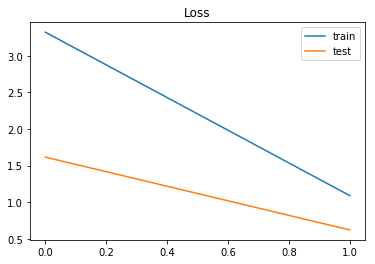

In [274]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

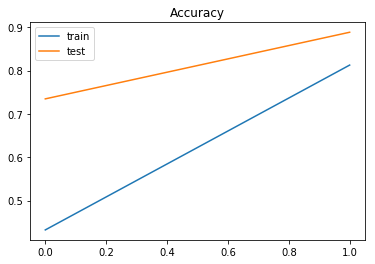

In [275]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [276]:
new_complaint = ['pain in the stomach']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
pred

array([[4.0687803e-05, 7.1152353e-05, 8.7311149e-05, ..., 4.6902414e-06,
        1.3335997e-05, 2.9275218e-06]], dtype=float32)